In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mask = pd.read_csv('./data/mask_text.csv')
vaccine = pd.read_csv('./data/vaccine_text.csv')

C:\Users\wongc\anaconda3\envs\comp4211\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\wongc\anaconda3\envs\comp4211\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,7,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
vaccine.head(50)

,date,user,is_retweet,is_quote,text,quoted_text,lat,long,hts,mentions,tweet_id,likes,retweets,replies,quote_count,original_tweet_id
0,"being of the citizens of the planet"". #CarlSag...",NaN,NaN,NaN,USElections2020;USA;USElection2020;COVID19;cor...,NaN,1.3233829940993188e+18,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-11-02 22:00:39,0Blair0,True,True,RT @JackPosobiec: The WHO helped China cover u...,China extracted concessions from the WHO that ...,NaN,NaN,NaN,NaN,1.3233845543678894e+18,0.0,0.0,0.0,0.0,1.323384e+18
2,2020-11-02 20:46:16,0CT0BERSURPRISE,True,False,RT @JoeBiden: This is my commitment to you: We...,NaN,NaN,NaN,NaN,NaN,1.323365833528103e+18,0.0,0.0,0.0,0.0,1.323291e+18
3,2020-11-03 13:26:58,0Gf1lCKkKy0ucqy,True,False,RT @HHShkMohd: While receiving the COVID-19 va...,NaN,NaN,NaN,NaN,NaN,1323617667178205186,0,0.0,0.0,0.0,1.323543e+18
4,2020-11-03 07:44:24,0Selna0,True,True,RT @angie_rasmussen: The most likely scenario ...,This long New York Times story on China’s refu...,NaN,NaN,NaN,NaN,1323531459957719042,0,0.0,0.0,0.0,1.323448e+18
5,2020-11-03 01:56:17,0_0_Sa,False,True,learn from China!,China crushed Covid19 in the Spring of this ye...,NaN,NaN,NaN,NaN,1323443854087843840,0,0.0,0.0,0.0,NaN
6,2020-11-02 20:35:03,0bama_gate,False,True,Your H1N1 Playbook where you stop testing at 6...,"In public, President Trump compared COVID-19 t...",NaN,NaN,NaN,NaN,1.323363010778407e+18,0.0,0.0,0.0,0.0,NaN
7,2020-11-02 23:22:53,0ct100,True,False,RT @Motard8559: El Coronavirus es tan selectiv...,NaN,NaN,NaN,NaN,NaN,1323405247734304769,0.0,0.0,0.0,0.0,1.323299e+18
8,2020-11-03 13:03:14,0dinesh_,True,False,RT @OpIndia_com: China obstructed WHO from inv...,NaN,NaN,NaN,NaN,NaN,1323611694614999043,0,0.0,0.0,0.0,1.323597e+18
9,2020-11-02 22:26:37,0drat,True,True,RT @PippaCrerar: Such a powerful report on BBC...,The effect of coronavirus on Liverpool's hospi...,NaN,NaN,NaN,NaN,1.3233910881162895e+18,0.0,0.0,0.0,0.0,1.323390e+18


In [8]:
user = vaccine['user']
hashtags = vaccine['hts']
nona = hashtags.notna()
truehts = hashtags[nona].reset_index(drop=True)
for i in range(len(truehts)):
    truehts[i] = truehts[i].lower()

In [9]:
htcount = list()
for i in range(len(truehts)):
    for j in range(len(truehts[i].split(';'))):
        htcount.append(truehts[i].split(';')[j])

In [10]:
htfreq = [htcount.count(ht) for ht in htcount]
htdict = dict(list(zip(htcount, htfreq)))
sorted_ht = sorted(htdict.items(), key = lambda k: k[1], reverse=True)

In [11]:
sorted_ht

[('covid19', 5869),
 ('coronavirus', 5677),
 ('covid', 1263),
 ('covid_19', 841),
 ('corona', 678),
 ('vaccine', 492),
 ('china', 429),
 ('coronaviruspandemic', 367),
 ('pandemic', 309),
 ('trump', 265),
 ('electionday', 244),
 ('biden', 241),
 ('virus', 239),
 ('election2020', 234),
 ('vote', 229),
 ('lockdown', 226),
 ('covidー19', 223),
 ('france', 215),
 ('coronavirusupdate', 214),
 ('covidiots', 193),
 ('covid19france', 189),
 ('covid__19', 172),
 ('india', 163),
 ('news', 150),
 ('florida', 148),
 ('texas', 146),
 ('pennsylvania', 144),
 ('staysafe', 140),
 ('taxpayers', 138),
 ('ohio', 135),
 ('maga', 130),
 ('oklahoma', 124),
 ('family', 123),
 ('lockdown2uk', 122),
 ('democrats', 121),
 ('fracking', 121),
 ('ethanol', 121),
 ('jobs', 120),
 ('covid19uk', 119),
 ('chinavirus', 111),
 ('coronavirusuk', 104),
 ('covid2019', 102),
 ('vaccines', 98),
 ('srilanka', 95),
 ('bidenharris2020', 95),
 ('breaking', 93),
 ('lockdown2', 90),
 ('facemask', 88),
 ('who', 86),
 ('health', 84),


In [12]:
ht_list = []
for i in range(200):
    ht_list.append(sorted_ht[i][0])

In [13]:
user_vac = vaccine.groupby(['user'])
ht_set = set(ht_list)

In [14]:
vaccine.groupby(['user']).mean()

,retweets,replies,quote_count,original_tweet_id
user,,,,
000stand,0.0,0.0,0.0,1.322969e+18
001fatalityrate,0.0,0.0,0.0,NaN
006Kike,0.0,0.0,0.0,1.323291e+18
007Dufour007,0.0,0.0,0.0,1.323325e+18
00mropinionated,0.0,0.0,0.0,NaN
...,...,...,...,...
zyrrish,0.0,0.0,0.0,NaN
zyyyye,0.0,0.0,0.0,1.323435e+18
zzposts,0.0,0.0,0.0,NaN


In [15]:
import re
def extract_ht(text):
    ht_extracted = re.findall(r"#(\w+)", text)
    return [x.lower() for x in ht_extracted]

In [27]:
ht_vectors = []
vector_user_index = {}
vector_ind = 0
for name, group in user_vac:
    if len(group) < 2:
        continue
    
    vector_user_index[vector_ind] = name
    vector_ind += 1
    
    user_ht_vector = [0.0]*len(ht_list)
    
    user_tweets = group['text'].tolist()
    extracted_hts = set(extract_ht(' '.join(user_tweets)))
    
    matching_hts = list([x for x in extracted_hts if x in ht_set])
    if len(matching_hts) == 0:
        continue
    for mht in matching_hts:
        m_index = ht_list.index(mht)
        user_ht_vector[m_index]+=1
        
    ht_vectors.append(user_ht_vector)

In [25]:
len(ht_vectors)

12834

In [55]:
G = nx.Graph()

In [10]:
G.remove_nodes_from(list(nx.isolates(G)))
G.number_of_nodes(), G.number_of_edges()

(687, 8224)

In [62]:
nx.write_gexf(G, "co_hashtag.gexf")

In [5]:
from embedding import Embedding

In [28]:
emb = Embedding(ht_vectors)
emb.dimReduce()
# emb.cluster()
# emb.plot(n2v.graph)
# emb.evaluate_dimReduce(n2v.valid_edges, n2v.false_edges)

In [29]:
emb.cluster()

In [30]:
import seaborn as sns

<AxesSubplot:>

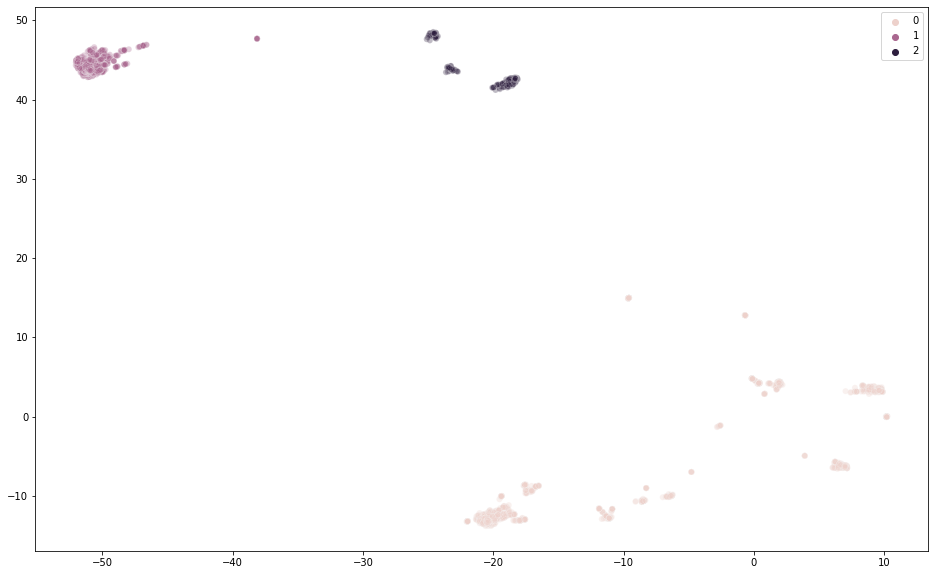

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=emb.get_nodes_pos()[:,0], y=emb.get_nodes_pos()[:,1],
    hue=emb.get_nodes_cluster(),
    # palette=sns.color_palette("hls", 2),
    # data=df_subset,
    legend="full",
    alpha=0.3)

<AxesSubplot:>

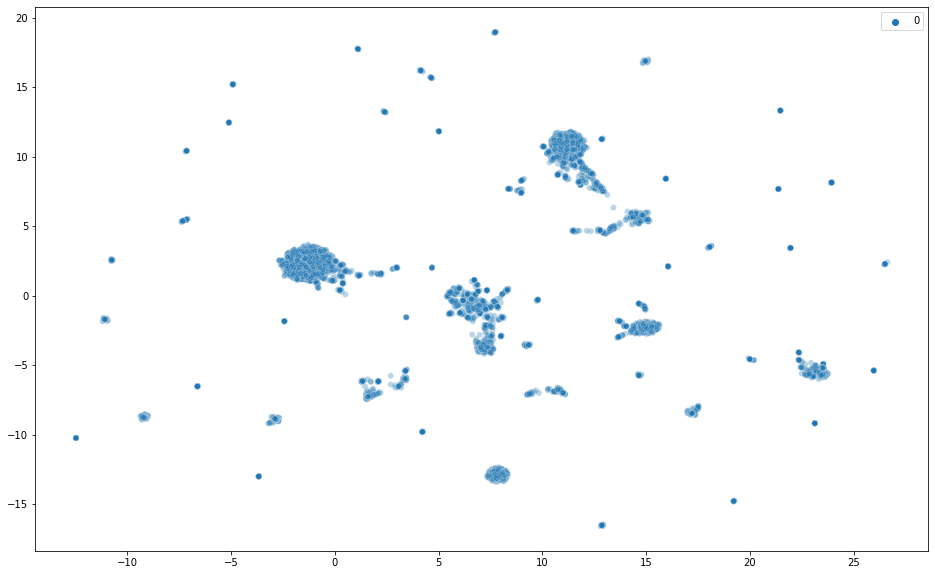

In [24]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=emb.get_nodes_pos()[:,0], y=emb.get_nodes_pos()[:,1],
    hue=emb.get_nodes_cluster(),
    # palette=sns.color_palette("hls", 2),
    # data=df_subset,
    legend="full",
    alpha=0.3)